# IRIS DATA

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

## Loading dataset 
## Using read_csv() from pandas library to load data.

In [2]:
data=pd.read_csv("../input/iris/Iris.csv")

### Head() function from pandas is used to get the entry of n rows. 
### By deafault head() functon is used to read first five rows. 
### Indexing of rows start with 0.

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Getting all the columns names.

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Shape is used to get the number of rows and columns present in the data.


In [5]:
data.shape

(150, 6)

### From above we get to know that we have 150 rows and 5 columns present in the dataset where rows are considered to be entries and columns are considered to be features.

### Check if there's any 0's present in the data. 

In [6]:
data.isin([0]).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Getting the types of species from the species column. 

In [7]:
species=data['Species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## From above we can see that we got three diffent types of species in data set Iris-setosa,Iris-versicolor, Iris-virginica. 

## Visualization of  data 

### seaborn FacetGrid Plot
#### This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

## Sepal Length(Cm) vs Sepal Width(Cm)

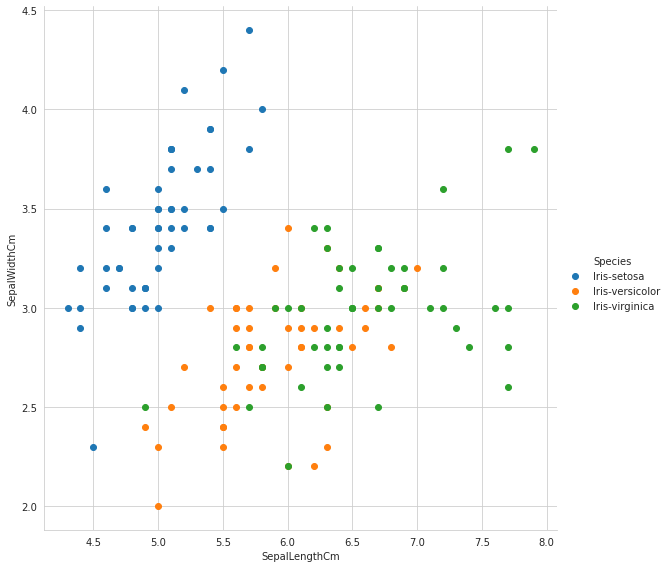

In [8]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data,hue='Species',size=8)
g.map(plt.scatter,'SepalLengthCm', 'SepalWidthCm') 
g.add_legend()
plt.show()


## From the above plot we can analyse that:
### 1. For species Iris-Setosa the Sepal_Width(in cm) is usually in range 2.9cm-4.3cm with Sepal_Length(in cm) in range 4.3-5.8cm approximately.
### 2. For species Iris-Versicolor the Sepal_Width(in cm) is usually in range 2.0cm-3.4cm with Sepal_Length(in cm) in range 5.0cm-7.0cm approximately.
### 3. For species Iris-Virginica the Sepal_Width(in cm) is usually in range 2.5cm-3.8cm with Sepal_Length(in cm) in range 5.8cm-7.7cm approximately.

## Petal Length(Cm) vs Petal Width(Cm)

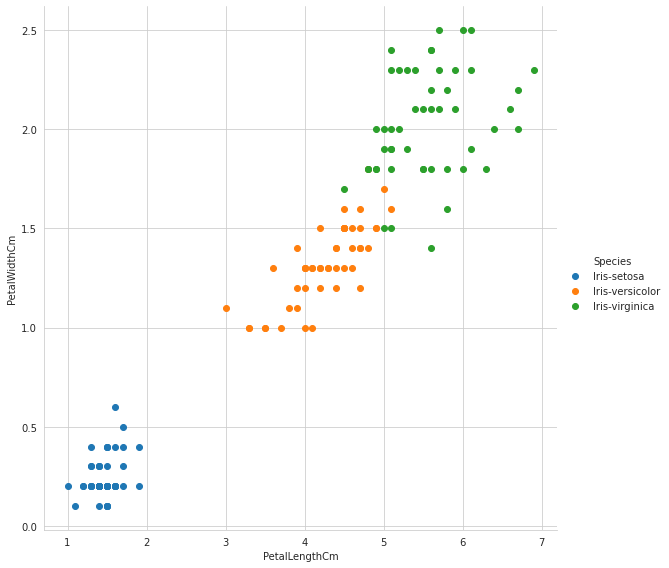

In [9]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data,hue='Species',size=8)
g.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm') 
g.add_legend()
plt.show()

## From the above plot we can analyse that:
### 1. For species Iris-Setosa the Petal_Width(in cm) is usually in range 0.2cm-0.5cm with Petal_Length(in cm) in range 1.0cm-1.9cm approximately.
### 2. For species Iris-Versicolor the Petal_Width(in cm) is usually in range 1.0cm-1.5cm with Petal_Length(in cm) in range 3.2cm-4.0cm approximately.
### 3. For species Iris-Virginica the Petal_Width(in cm) is usually in range 1.5cm-2.5cm with Petal_Length(in cm) in range 4.8cm-6.9cm approximately.

## seaborn Lmplot

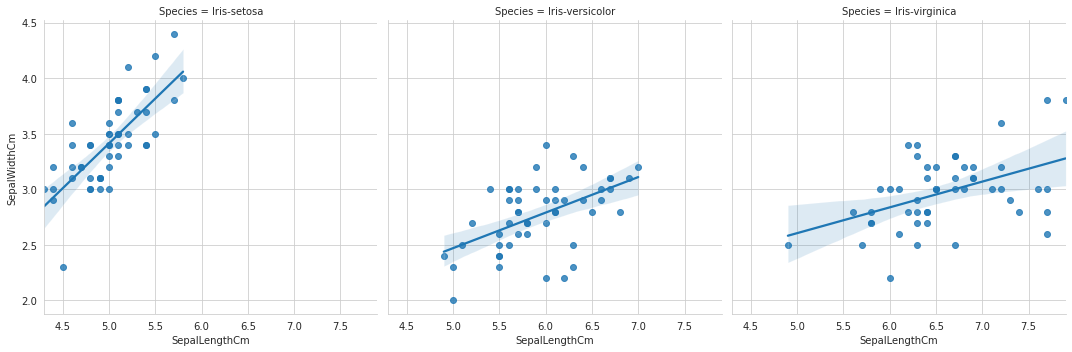

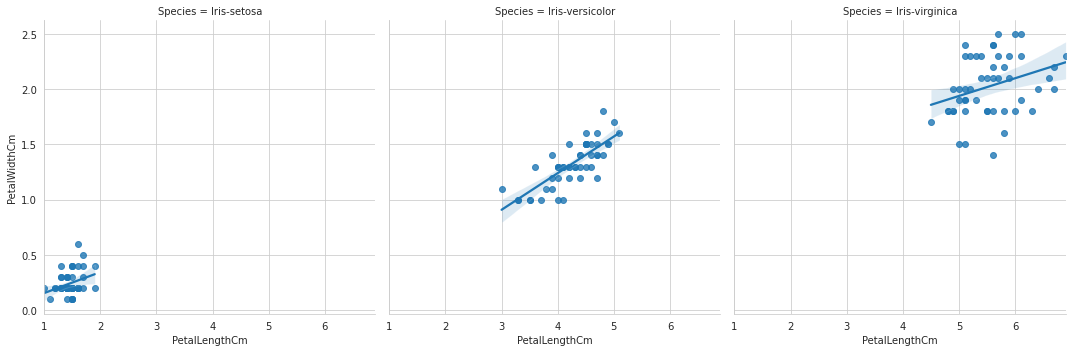

In [10]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm',col="Species",data=data)
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm',col="Species",data=data)

## From the above plot we can analyse that:
## A. In case of Sepal width(in cm ) with respect to Sepal Length(in cm):
###   1. The trend line in Iris-Setosa seems to have more slope that means the Sepal Width(in cm) increases more with respect to sepal length(in cm).
###   2. The trend line in Iris-Versiicolor and Iris-Virginica seems to have almost equal  slope but less than Iris-Setosa.
## B. In case of Peatl width(in cm) with respect to Petal Length(in cm):
###   1.The trend line in Iris-Versiicolor seems to have more slope that means the Petal Width(in cm) increases more with respect to petal length(in cm).
###   2.The trend line in Iris-Setosa and Iris-Virginica seems to have almost equal  slope but less than Iris-Versiicolor.


## Label encoding

In [13]:
label_encoder = preprocessing.LabelEncoder() 
data['Species']= label_encoder.fit_transform(data['Species']) 
data['Species'].unique()



array([0, 1, 2])

## To handle categorical feature in Species we use labelencoder.fittransform method to assign appropriate integer value to different types of Species present in dataset which further can used in model
## {Iris-Setosa:0, Iris-Versiicolor:1,Iris-Virginica:2}

## Extracting target and input data

In [14]:
input_data=data.iloc[:,[0,1,2,3]].values
target=data.iloc[:,-1].values


## Funtion for train test split using startified Kfold.

### StratifiedKFold try to divide imbalanced Kfolds in train_test_split so to prevent overfitting and underfitting of model.

In [15]:
from sklearn.model_selection import StratifiedKFold
def skf(model,a,b):
    f=StratifiedKFold(n_splits=30)
    scores=[]
    for train_index,test_index in f.split(a,b):
        x_train ,x_test,y_train,y_test=a[train_index],a[test_index],b[ train_index],b[test_index]
        model.fit(x_train,y_train)
        scores.append(model.score(x_test,y_test))
    return scores

## Importing libraries for SVM,Decision Tree Classifier,Logistic regression

In [16]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression

### Using SVM

In [17]:
np.array(skf(SVC(),input_data,target)).mean()
    

0.9866666666666667

### Using Decision Tree Classifier

In [18]:
np.array(skf(tree.DecisionTreeClassifier(),input_data,target)).mean()

0.9800000000000001

###  Using Logistic regression

In [19]:
np.array(skf(LogisticRegression(max_iter=150),input_data,target)).mean()

0.9933333333333334

In [20]:
from sklearn.ensemble import RandomForestClassifier
np.array(skf(RandomForestClassifier(n_estimators=100),input_data,target)).mean()

1.0

# Conlusion:
# As we can see that we are getting pretty good results 
## In SVM and Decision Tree Classifier we get 98% acuuracy.
## In Logistic regression  we get 99% accuracy.
## In Random Forest Classifier we get 100% accuracy